In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('2018_2019_24-59mos_underweight_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 42
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'electrct1', 'drinksafe', 'makesafe', 'wcooking', 'whands',
       'collect', 'burn', 'composting', 'dump', 'segregate', 'underweight'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,underweight
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,1
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,1
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,1


#  FEATURE SELECTION USING CHI2

In [4]:
X = df.iloc[:,0:39]
y = df.iloc[:,-1]
feature = SelectKBest(score_func=chi2, k=10)
fit = feature.fit(X,y)

In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
features = pd.concat([dfcolumns,dfscores], axis = 1)
features.columns = ['Overweight','Scores']
features

,Overweight,Scores
0,age_child,0.271879
1,agemos,8.222242
2,AgeGroup,1.603852
3,sex_child,0.278088
4,gastation,0.115332
5,place_delivery,5.503810
6,assistd,4.371451
7,typeofd,7.560869
8,pregtype,0.075783
9,bw_grams,39047.559159


In [7]:
print(features.nlargest(10, "Scores"))

       Overweight        Scores
9        bw_grams  39047.559159
23        psoc_hh   1473.625527
32      drinksafe    286.392861
33       makesafe    203.737151
19         age_hh    178.328115
15     psccat_mom    131.896843
35         whands    109.313843
17      occup_mom     73.395615
28  drinkingwater     73.115632
29  recipient_4ps     69.247691


In [9]:
data = df[["bw_grams","psoc_hh","drinksafe","makesafe","age_hh","psccat_mom",
          "whands","occup_mom","drinkingwater","recipient_4ps","underweight"]]

In [12]:
data.columns

Index(['bw_grams', 'psoc_hh', 'drinksafe', 'makesafe', 'age_hh', 'psccat_mom',
       'whands', 'occup_mom', 'drinkingwater', 'recipient_4ps', 'underweight'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14490 entries, 0 to 14489
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   bw_grams       14490 non-null  int64
 1   psoc_hh        14490 non-null  int64
 2   drinksafe      14490 non-null  int64
 3   makesafe       14490 non-null  int64
 4   age_hh         14490 non-null  int64
 5   psccat_mom     14490 non-null  int64
 6   whands         14490 non-null  int64
 7   occup_mom      14490 non-null  int64
 8   drinkingwater  14490 non-null  int64
 9   recipient_4ps  14490 non-null  int64
 10  underweight    14490 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [14]:
data.head()

,bw_grams,psoc_hh,drinksafe,makesafe,age_hh,psccat_mom,whands,occup_mom,drinkingwater,recipient_4ps,underweight
0,2400,6,0,0,37,0,2,10,0,1,1
1,2500,99,9,9,54,2,2,10,1,0,0
2,2500,6,0,0,38,0,2,5,0,1,1
3,3200,6,0,0,36,0,2,5,0,0,0
4,2800,8,9,9,44,0,2,10,1,0,1


In [15]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())


'Total number of of Duplicates present in data: 181'

In [16]:
data = data.drop_duplicates()

In [17]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())


'Total number of of Duplicates present in data: 0'

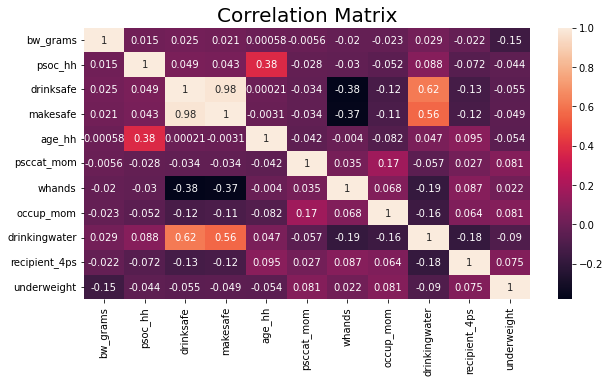

In [18]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

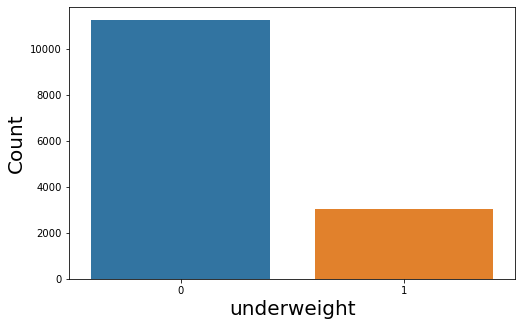

In [19]:
underweight_label = data.underweight.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(underweight_label.index, underweight_label);
plt.xlabel('underweight', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [20]:
data['underweight'].value_counts()

0    11273
1     3036
Name: underweight, dtype: int64

In [21]:
Final = df[["bw_grams","psoc_hh","drinksafe","makesafe","age_hh","psccat_mom",
          "whands","occup_mom","drinkingwater","recipient_4ps"]]
Target =df['underweight']

In [22]:
Final.head()

,bw_grams,psoc_hh,drinksafe,makesafe,age_hh,psccat_mom,whands,occup_mom,drinkingwater,recipient_4ps
0,2400,6,0,0,37,0,2,10,0,1
1,2500,99,9,9,54,2,2,10,1,0
2,2500,6,0,0,38,0,2,5,0,1
3,3200,6,0,0,36,0,2,5,0,0
4,2800,8,9,9,44,0,2,10,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [24]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.788
Accuracy score : 0.7922705314009661


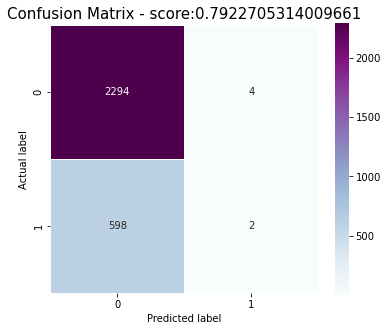

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2298
           1       0.33      0.00      0.01       600

    accuracy                           0.79      2898
   macro avg       0.56      0.50      0.45      2898
weighted avg       0.70      0.79      0.70      2898



In [25]:
log_model= LogisticRegression()
log_model.fit(X_train,y_train)
logistic_pred= log_model.predict(X_test)
from sklearn import metrics

log_cm = metrics.confusion_matrix(y_test, logistic_pred)
plt.figure(figsize=(6,5))
sns.heatmap(log_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,logistic_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,logistic_pred))


Training score: 0.991
Accuracy score:  0.7746721877156659


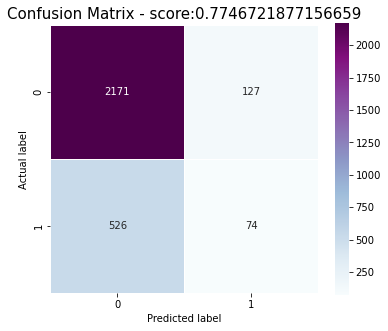

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2298
           1       0.37      0.12      0.18       600

    accuracy                           0.77      2898
   macro avg       0.59      0.53      0.53      2898
weighted avg       0.71      0.77      0.73      2898



In [26]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

rforest_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rforest_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,rf_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,rf_pred))


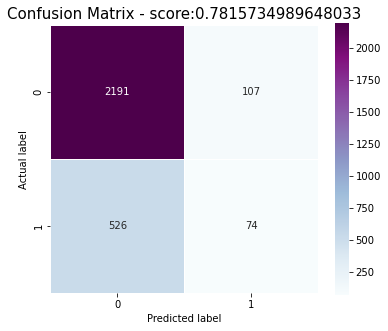

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2298
           1       0.41      0.12      0.19       600

    accuracy                           0.78      2898
   macro avg       0.61      0.54      0.53      2898
weighted avg       0.72      0.78      0.73      2898



In [27]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [28]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.936
Test score: 0.776


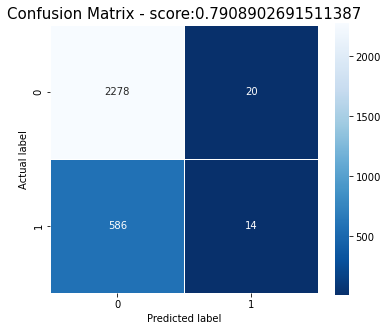

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      2298
           1       0.41      0.02      0.04       600

    accuracy                           0.79      2898
   macro avg       0.60      0.51      0.46      2898
weighted avg       0.72      0.79      0.71      2898



In [29]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))

In [31]:
from sklearn.utils import resample

#Separate Target Classes
df_1 = data[data.underweight==0]
df_2 = data[data.underweight==1]

# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=11273,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.underweight.value_counts()
df_upsampled.reset_index(drop=True)

,bw_grams,psoc_hh,drinksafe,makesafe,age_hh,psccat_mom,whands,occup_mom,drinkingwater,recipient_4ps,underweight
0,2500,99,9,9,54,2,2,10,1,0,0
1,3200,6,0,0,36,0,2,5,0,0,0
2,2700,8,9,9,44,0,2,9,1,0,0
3,3000,6,0,0,49,0,2,5,0,0,0
4,3500,7,9,9,46,0,1,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22541,4536,9,1,3,43,0,11,10,0,0,1
22542,2800,99,9,9,72,0,1,4,1,0,1
22543,3232,8,0,0,32,0,13,5,1,0,1
22544,3200,5,0,0,34,0,11,3,1,0,1


In [32]:
df_upsampled['underweight'].value_counts()

0    11273
1    11273
Name: underweight, dtype: int64

In [33]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'drinksafe', 'makesafe', 'age_hh', 'psccat_mom',
       'whands', 'occup_mom', 'drinkingwater', 'recipient_4ps', 'underweight'],
      dtype='object')

In [34]:
Final = df_upsampled[["bw_grams","psoc_hh","drinksafe","makesafe","age_hh","psccat_mom",
          "whands","occup_mom","drinkingwater","recipient_4ps"]]
Target =df_upsampled['underweight']

In [35]:
Final.head()

,bw_grams,psoc_hh,drinksafe,makesafe,age_hh,psccat_mom,whands,occup_mom,drinkingwater,recipient_4ps
1,2500,99,9,9,54,2,2,10,1,0
3,3200,6,0,0,36,0,2,5,0,0
5,2700,8,9,9,44,0,2,9,1,0
6,3000,6,0,0,49,0,2,5,0,0
7,3500,7,9,9,46,0,1,10,1,0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [37]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.596
Accuracy score : 0.5971175166297118


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)



Training score: 0.996
Accuracy score:  0.9048780487804878


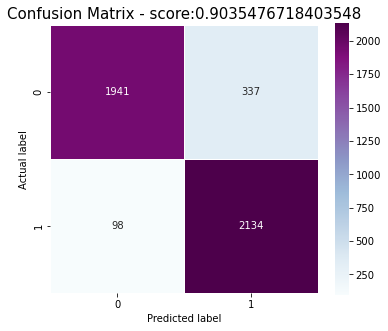

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2278
           1       0.86      0.96      0.91      2232

    accuracy                           0.90      4510
   macro avg       0.91      0.90      0.90      4510
weighted avg       0.91      0.90      0.90      4510



In [39]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [40]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.939
Test score: 0.845


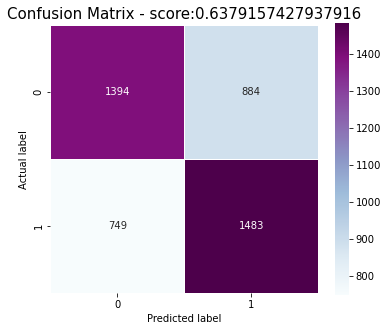

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      2278
           1       0.63      0.66      0.64      2232

    accuracy                           0.64      4510
   macro avg       0.64      0.64      0.64      4510
weighted avg       0.64      0.64      0.64      4510



In [41]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

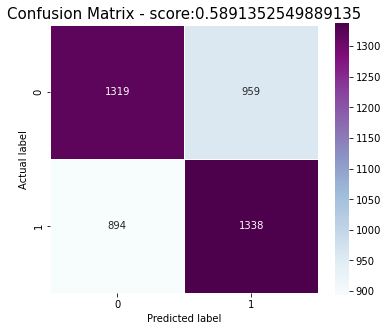

              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2278
           1       0.58      0.60      0.59      2232

    accuracy                           0.59      4510
   macro avg       0.59      0.59      0.59      4510
weighted avg       0.59      0.59      0.59      4510



In [42]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


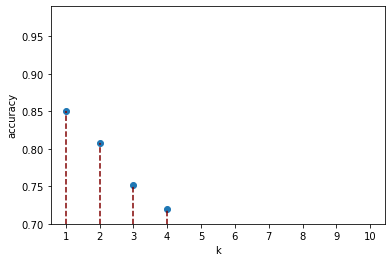

In [43]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

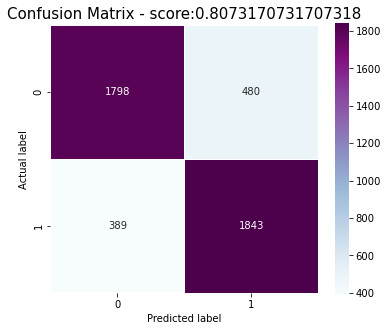

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2278
           1       0.79      0.83      0.81      2232

    accuracy                           0.81      4510
   macro avg       0.81      0.81      0.81      4510
weighted avg       0.81      0.81      0.81      4510



In [44]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [45]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.8144821468174761
Testing accuracy =  0.7414634146341463


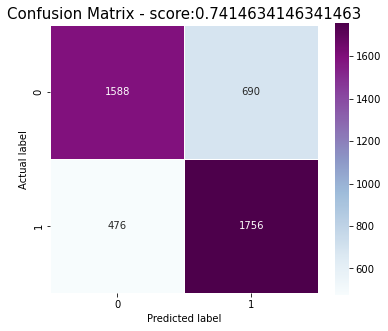

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2278
           1       0.72      0.79      0.75      2232

    accuracy                           0.74      4510
   macro avg       0.74      0.74      0.74      4510
weighted avg       0.74      0.74      0.74      4510



0.7414634146341463

In [46]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [47]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.5817254380128631
Testing accuracy =  0.5787139689578714


0.5787139689578714

In [48]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6236216922975256 0.9670490447824132 0.9172260141418146 0.9172260141418146 0.8171317275104553 0.6205147963534635


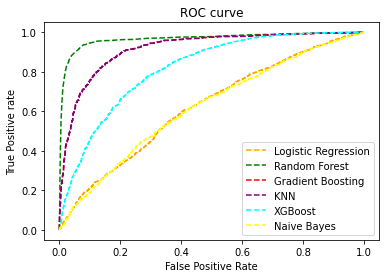

In [49]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [50]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','Extreme Gradient Boosting', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [51]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

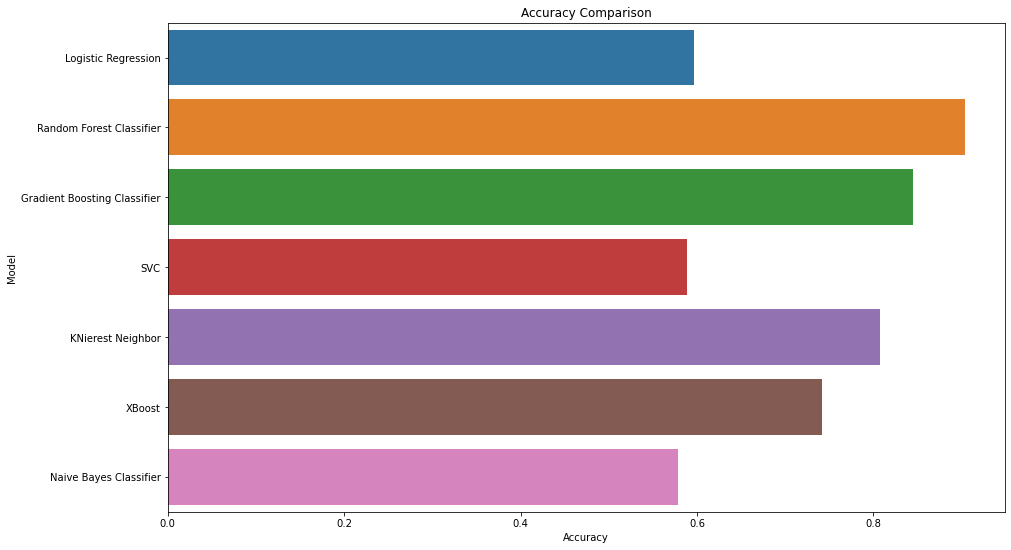

In [52]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

In [53]:
y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.9035476718403548


In [54]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
2596,1,1,0
642,0,0,0
2187,1,1,0
11258,0,0,0
1025,0,0,0
3430,0,0,0
11488,1,1,0
10538,1,0,1
1965,0,0,0
3838,0,0,0


# Features Importance using ExtraTreeClassifier

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.03593478 0.05442485 0.03113802 0.02989965 0.00594966 0.01048321
 0.00808678 0.0092038  0.00422142 0.06617874 0.01527282 0.01272775
 0.05399575 0.01794523 0.03161669 0.02338945 0.03582511 0.02162859
 0.01325927 0.05442004 0.02506097 0.01297697 0.03474201 0.04448524
 0.00745206 0.02595105 0.04739301 0.01934214 0.01193372 0.02233341
 0.01031896 0.01078246 0.02086065 0.02372393 0.04276424 0.04243957
 0.01744535 0.02301683 0.0213758 ]


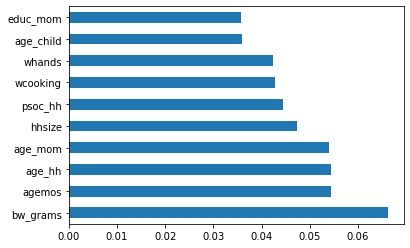

In [56]:
f_importances = pd.Series(model.feature_importances_, index = X.columns)
f_importances.nlargest(10).plot(kind='barh')
plt.show()

In [57]:
data2 = df[["bw_grams","agemos","age_hh","age_mom","hhsize","psoc_hh",
           "wcooking","whands","age_child","educ_mom","underweight"]]

In [58]:
data2.head()

,bw_grams,agemos,age_hh,age_mom,hhsize,psoc_hh,wcooking,whands,age_child,educ_mom,underweight
0,2400,48,37,33,5,6,2,2,4,2,1
1,2500,34,54,26,10,99,2,2,3,1,0
2,2500,51,38,35,5,6,2,2,4,2,1
3,3200,51,36,38,7,6,2,2,4,2,0
4,2800,28,44,43,8,8,2,2,2,2,1


In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14490 entries, 0 to 14489
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bw_grams     14490 non-null  int64
 1   agemos       14490 non-null  int64
 2   age_hh       14490 non-null  int64
 3   age_mom      14490 non-null  int64
 4   hhsize       14490 non-null  int64
 5   psoc_hh      14490 non-null  int64
 6   wcooking     14490 non-null  int64
 7   whands       14490 non-null  int64
 8   age_child    14490 non-null  int64
 9   educ_mom     14490 non-null  int64
 10  underweight  14490 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [60]:
display("Total number of of Duplicates present in data: %s" %data2.duplicated().sum())

'Total number of of Duplicates present in data: 15'

In [61]:
data2 = data2.drop_duplicates()

In [62]:
display("Total number of of Duplicates present in data: %s" %data2.duplicated().sum())

'Total number of of Duplicates present in data: 0'

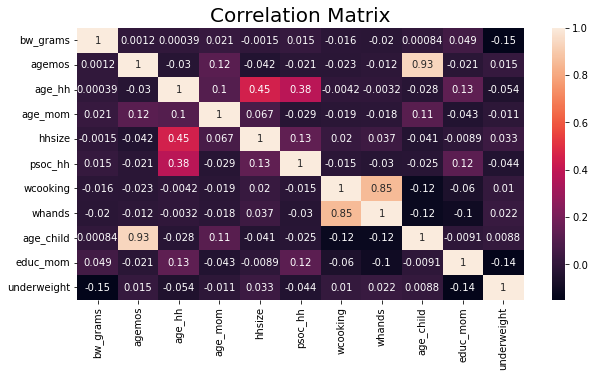

In [63]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data2.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [65]:
Final2 = df[["bw_grams","agemos","age_hh","age_mom","hhsize","psoc_hh",
           "wcooking","whands","age_child","educ_mom"]]
Target2 =df['underweight']

In [66]:
Final2.head()

,bw_grams,agemos,age_hh,age_mom,hhsize,psoc_hh,wcooking,whands,age_child,educ_mom
0,2400,48,37,33,5,6,2,2,4,2
1,2500,34,54,26,10,99,2,2,3,1
2,2500,51,38,35,5,6,2,2,4,2
3,3200,51,36,38,7,6,2,2,4,2
4,2800,28,44,43,8,8,2,2,2,2


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final2,Target2,test_size = 0.2, random_state=42)

In [68]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.787
Accuracy score : 0.7915804002760525


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.997
Accuracy score:  0.7864044168391995


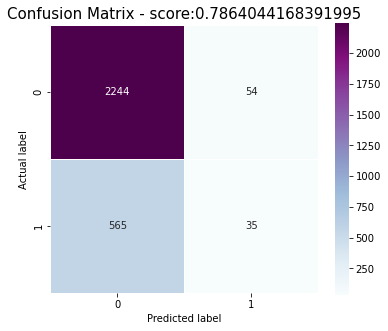

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2298
           1       0.39      0.06      0.10       600

    accuracy                           0.79      2898
   macro avg       0.60      0.52      0.49      2898
weighted avg       0.71      0.79      0.72      2898



In [70]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [71]:
data2['underweight'].value_counts()

0    11419
1     3056
Name: underweight, dtype: int64

In [72]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14475 entries, 0 to 14489
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bw_grams     14475 non-null  int64
 1   agemos       14475 non-null  int64
 2   age_hh       14475 non-null  int64
 3   age_mom      14475 non-null  int64
 4   hhsize       14475 non-null  int64
 5   psoc_hh      14475 non-null  int64
 6   wcooking     14475 non-null  int64
 7   whands       14475 non-null  int64
 8   age_child    14475 non-null  int64
 9   educ_mom     14475 non-null  int64
 10  underweight  14475 non-null  int64
dtypes: int64(11)
memory usage: 1.3 MB


In [73]:
data2.head()

,bw_grams,agemos,age_hh,age_mom,hhsize,psoc_hh,wcooking,whands,age_child,educ_mom,underweight
0,2400,48,37,33,5,6,2,2,4,2,1
1,2500,34,54,26,10,99,2,2,3,1,0
2,2500,51,38,35,5,6,2,2,4,2,1
3,3200,51,36,38,7,6,2,2,4,2,0
4,2800,28,44,43,8,8,2,2,2,2,1


In [74]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data2[data2.underweight==0]
df_2 = data2[data2.underweight==1]
 
# Upsample minority class
df_2_upsampled2 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=11419,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled2 = pd.concat([df_1, df_2_upsampled2])
 
# Display new class counts
df_upsampled2.underweight.value_counts()
df_upsampled2.reset_index(drop=True)

,bw_grams,agemos,age_hh,age_mom,hhsize,psoc_hh,wcooking,whands,age_child,educ_mom,underweight
0,2500,34,54,26,10,99,2,2,3,1,0
1,3200,51,36,38,7,6,2,2,4,2,0
2,2700,40,44,21,8,8,2,2,3,3,0
3,3000,26,49,23,5,6,2,2,2,2,0
4,3500,41,46,44,7,7,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
22833,2400,56,34,33,4,6,4,4,5,3,1
22834,2460,38,40,35,4,7,1,1,3,3,1
22835,4000,26,43,40,8,4,1,1,2,3,1
22836,3500,41,33,29,4,5,4,1,3,2,1


In [75]:
df_upsampled2.columns

Index(['bw_grams', 'agemos', 'age_hh', 'age_mom', 'hhsize', 'psoc_hh',
       'wcooking', 'whands', 'age_child', 'educ_mom', 'underweight'],
      dtype='object')

In [76]:
df_upsampled2['underweight'].value_counts()

0    11419
1    11419
Name: underweight, dtype: int64

In [77]:
Final3 = df_upsampled2[["bw_grams","agemos","age_hh","age_mom","hhsize","psoc_hh",
           "wcooking","whands","age_child","educ_mom"]]
Target3 =df_upsampled2['underweight']

In [78]:
Final3.head()

,bw_grams,agemos,age_hh,age_mom,hhsize,psoc_hh,wcooking,whands,age_child,educ_mom
1,2500,34,54,26,10,99,2,2,3,1
3,3200,51,36,38,7,6,2,2,4,2
5,2700,40,44,21,8,8,2,2,3,3
6,3000,26,49,23,5,6,2,2,2,2
7,3500,41,46,44,7,7,1,1,3,1


In [79]:
Target3.value_counts()

0    11419
1    11419
Name: underweight, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final3,Target3,test_size = 0.2, random_state=42)

In [81]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.583
Accuracy score : 0.5823117338003503


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)

Training score: 1.000
Accuracy score:  0.9229422066549913


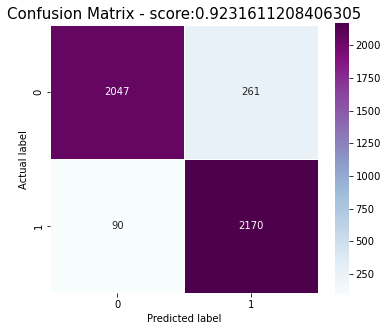

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2308
           1       0.89      0.96      0.93      2260

    accuracy                           0.92      4568
   macro avg       0.93      0.92      0.92      4568
weighted avg       0.93      0.92      0.92      4568



In [83]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [84]:
 gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.975
Test score: 0.875


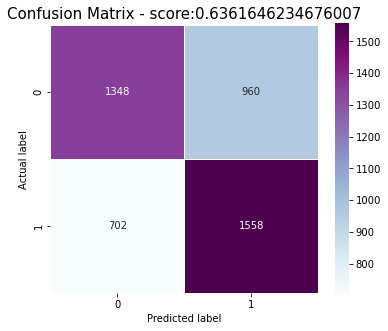

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      2308
           1       0.62      0.69      0.65      2260

    accuracy                           0.64      4568
   macro avg       0.64      0.64      0.64      4568
weighted avg       0.64      0.64      0.64      4568



In [85]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

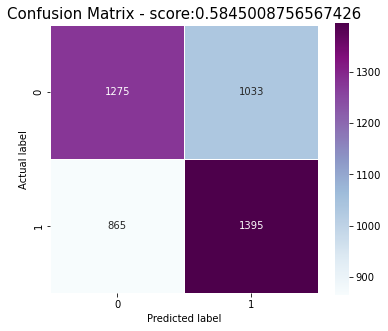

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      2308
           1       0.57      0.62      0.60      2260

    accuracy                           0.58      4568
   macro avg       0.59      0.58      0.58      4568
weighted avg       0.59      0.58      0.58      4568



In [86]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


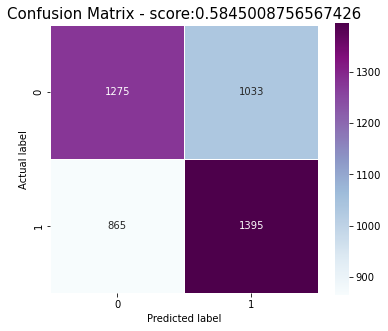

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      2308
           1       0.57      0.62      0.60      2260

    accuracy                           0.58      4568
   macro avg       0.59      0.58      0.58      4568
weighted avg       0.59      0.58      0.58      4568



In [87]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


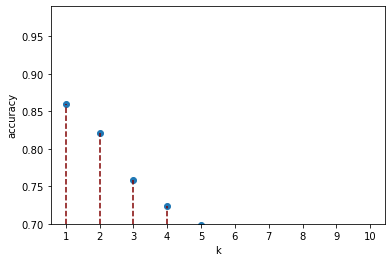

In [88]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

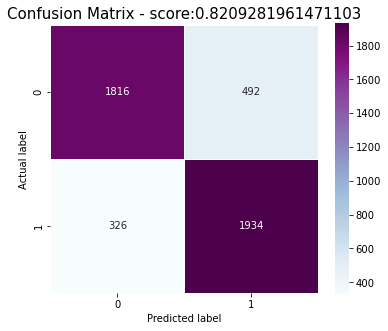

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2308
           1       0.80      0.86      0.83      2260

    accuracy                           0.82      4568
   macro avg       0.82      0.82      0.82      4568
weighted avg       0.82      0.82      0.82      4568



In [89]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [90]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.876135741652983
Testing accuracy =  0.7786777583187391


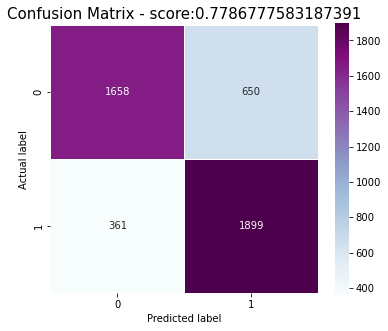

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      2308
           1       0.74      0.84      0.79      2260

    accuracy                           0.78      4568
   macro avg       0.78      0.78      0.78      4568
weighted avg       0.78      0.78      0.78      4568



0.7786777583187391

In [91]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [92]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.6075533661740559
Testing accuracy =  0.6035464098073555


0.6035464098073555

In [93]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6107209820401528 0.9743122229720402 0.9500439985583043 0.9500439985583043 0.8530948528396803 0.6408355508351099


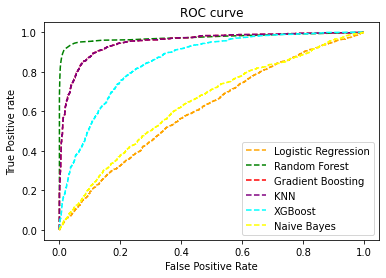

In [94]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [95]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}


In [96]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.582312
1,Random Forest Classifier,0.923161
2,Gradient Boosting Classifier,0.875000
3,SVC,0.584501
4,KNierest Neighbor,0.820928
5,XBoost,0.778678
6,Naive Bayes Classifier,0.603546


In [97]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

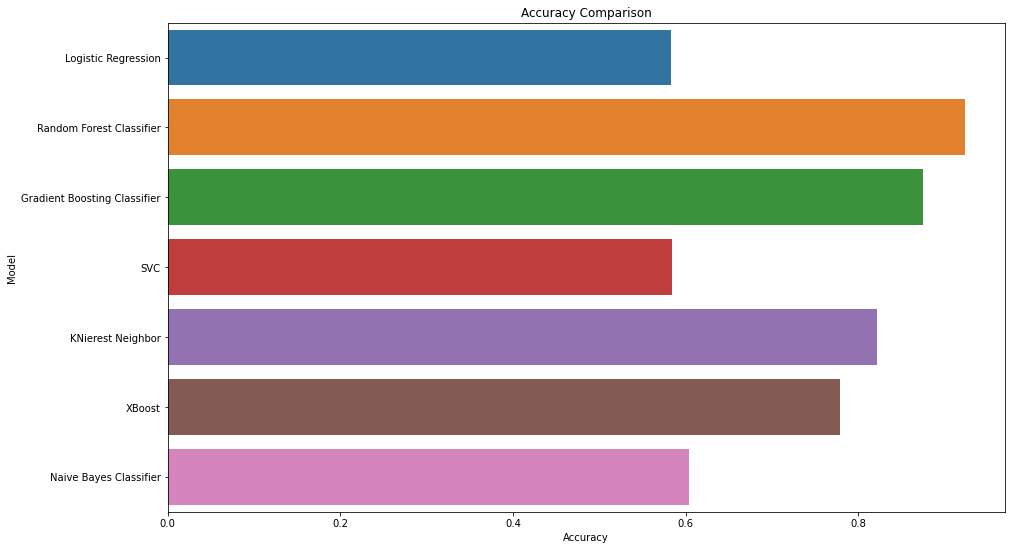

In [98]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

In [100]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
1000,1,1,0
13715,1,0,1
3417,1,0,1
10372,0,0,0
3239,0,0,0
7695,1,1,0
8371,0,0,0
11964,0,1,-1
5290,0,0,0
9459,1,1,0


# WRAPPER METHOD USING FORWARD SELECTION

In [101]:
#shape of the data
df.shape

(14490, 42)

In [102]:
df.isnull().sum()

age_child          0
agemos             0
AgeGroup           0
sex_child          0
gastation          0
place_delivery     0
assistd            0
typeofd            0
pregtype           0
bw_grams           0
bw_status          0
ethnicity          0
age_mom            0
agegroup_mom       0
csc_mom            0
psccat_mom         0
educ_mom           0
occup_mom          0
work_status_mom    0
age_hh             0
agegroup_HH        0
sex_hh             0
educ_hh            0
psoc_hh            0
work_status_hh     0
urbanity           0
hhsize             0
hhsize_code        0
drinkingwater      0
recipient_4ps      0
toilet             0
electrct1          0
drinksafe          0
makesafe           0
wcooking           0
whands             0
collect            0
burn               0
composting         0
dump               0
segregate          0
underweight        0
dtype: int64

In [104]:
x = df.drop(['underweight'], axis=1)
y = df['underweight']

In [105]:
x.shape, y.shape

((14490, 41), (14490,))

In [106]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [107]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished

[2022-11-08 15:50:53] Features: 1/10 -- score: -0.16298667807916983[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.5s finished

[2022-11-08 15:50:53] Features: 2/10 -- score: -0.15988037843946884[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.6s finished

[2022-11-08 15:50:54] Features: 3/10 -- score: -0.15913090903183127[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

# Forward Feature Selection

In [108]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['AgeGroup', 'typeofd', 'bw_grams', 'bw_status', 'psccat_mom', 'educ_mom', 'age_hh', 'educ_hh', 'hhsize', 'drinkingwater']


In [109]:
# creating a new dataframe using the above variables and adding the target variable
new_data = df[feat_names]
new_data['underweight'] = df['underweight']

# first five rows of the new data
new_data.head()

C:\Users\SUPERV~1\AppData\Local\Temp/ipykernel_5164/1882760979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['underweight'] = df['underweight']


,AgeGroup,typeofd,bw_grams,bw_status,psccat_mom,educ_mom,age_hh,educ_hh,hhsize,drinkingwater,underweight
0,3,1,2400,1,0,2,37,3,5,0,1
1,1,1,2500,2,2,1,54,2,10,1,0
2,3,1,2500,2,0,2,38,1,5,0,1
3,3,1,3200,2,0,2,36,2,7,0,0
4,1,1,2800,2,0,2,44,1,8,1,1


In [165]:
# shape of new and original data
new_data.shape, df.shape

((14251, 11), (14490, 42))

In [166]:
new_data.head()

,AgeGroup,typeofd,bw_grams,bw_status,psccat_mom,educ_mom,age_hh,educ_hh,hhsize,drinkingwater,underweight
0,3,1,2400,1,0,2,37,3,5,0,1
1,1,1,2500,2,2,1,54,2,10,1,0
2,3,1,2500,2,0,2,38,1,5,0,1
3,3,1,3200,2,0,2,36,2,7,0,0
4,1,1,2800,2,0,2,44,1,8,1,1


In [167]:
new_data.describe()

,AgeGroup,typeofd,bw_grams,bw_status,psccat_mom,educ_mom,age_hh,educ_hh,hhsize,drinkingwater,underweight
count,14251.000000,14251.000000,14251.000000,14251.000000,14251.00000,14251.000000,14251.000000,14251.000000,14251.000000,14251.000000,14251.000000
mean,2.036910,1.115009,2975.887025,1.870465,0.56775,2.083292,43.286436,1.780226,6.310855,0.396534,0.213950
std,0.812645,0.319045,601.834571,0.335803,0.86877,0.687744,13.380622,0.735261,2.575961,0.489195,0.410106
min,1.000000,1.000000,900.000000,1.000000,0.00000,0.000000,18.000000,0.000000,2.000000,0.000000,0.000000
25%,1.000000,1.000000,2620.000000,2.000000,0.00000,2.000000,33.000000,1.000000,4.000000,0.000000,0.000000
50%,2.000000,1.000000,3000.000000,2.000000,0.00000,2.000000,40.000000,2.000000,6.000000,0.000000,0.000000
75%,3.000000,1.000000,3200.000000,2.000000,2.00000,3.000000,52.000000,2.000000,8.000000,1.000000,0.000000
max,3.000000,2.000000,9500.000000,2.000000,2.00000,4.000000,96.000000,4.000000,30.000000,1.000000,1.000000


In [168]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14489
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AgeGroup       14251 non-null  int64
 1   typeofd        14251 non-null  int64
 2   bw_grams       14251 non-null  int64
 3   bw_status      14251 non-null  int64
 4   psccat_mom     14251 non-null  int64
 5   educ_mom       14251 non-null  int64
 6   age_hh         14251 non-null  int64
 7   educ_hh        14251 non-null  int64
 8   hhsize         14251 non-null  int64
 9   drinkingwater  14251 non-null  int64
 10  underweight    14251 non-null  int64
dtypes: int64(11)
memory usage: 1.3 MB


In [169]:
display("Total number of of Duplicates present in data: %s" %new_data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

In [170]:
new_data = new_data.drop_duplicates()
display("Total number of of Duplicates present in data: %s" %new_data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

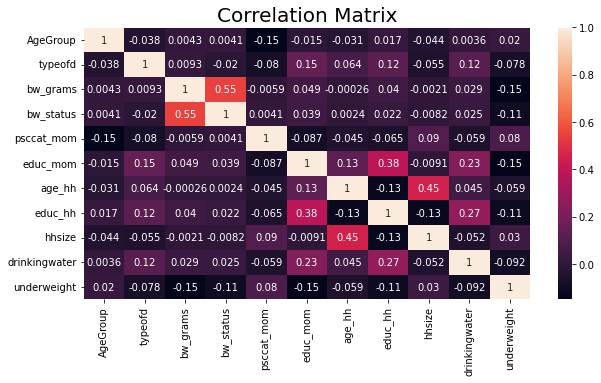

In [171]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(new_data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [172]:
final = new_data.drop(['underweight'], axis=1)
target = new_data['underweight']

In [173]:
final.head()

,AgeGroup,typeofd,bw_grams,bw_status,psccat_mom,educ_mom,age_hh,educ_hh,hhsize,drinkingwater
0,3,1,2400,1,0,2,37,3,5,0
1,1,1,2500,2,2,1,54,2,10,1
2,3,1,2500,2,0,2,38,1,5,0
3,3,1,3200,2,0,2,36,2,7,0
4,1,1,2800,2,0,2,44,1,8,1


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final,target,test_size = 0.2, random_state=42)

In [175]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.787
Accuracy score : 0.7814801823921431


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.991
Accuracy score:  0.7548228691687128


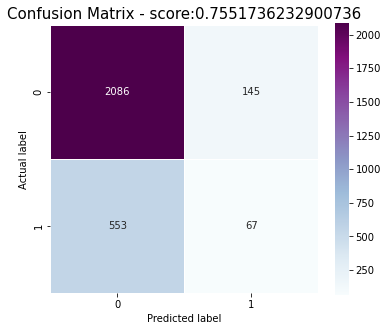

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2231
           1       0.32      0.11      0.16       620

    accuracy                           0.76      2851
   macro avg       0.55      0.52      0.51      2851
weighted avg       0.69      0.76      0.71      2851



In [177]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [178]:
new_data['underweight'].value_counts()

0    11202
1     3049
Name: underweight, dtype: int64

In [179]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = new_data[new_data.underweight==0]
df_2 = new_data[new_data.underweight==1]
 
# Upsample minority class
df_2_upsampled4 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=11202,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled5 = pd.concat([df_1, df_2_upsampled4])
 
# Display new class counts
df_upsampled5.underweight.value_counts()
df_upsampled5.reset_index(drop=True)

,AgeGroup,typeofd,bw_grams,bw_status,psccat_mom,educ_mom,age_hh,educ_hh,hhsize,drinkingwater,underweight
0,1,1,2500,2,2,1,54,2,10,1,0
1,3,1,3200,2,0,2,36,2,7,0,0
2,2,1,2700,2,0,3,44,1,8,1,0
3,1,1,3000,2,0,2,49,3,5,0,0
4,2,1,3500,2,0,1,46,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
22399,3,1,3629,2,0,2,43,1,11,1,1
22400,2,1,2500,2,0,2,35,2,6,1,1
22401,3,1,2500,2,2,1,86,1,10,0,1
22402,2,1,3000,2,0,2,43,3,6,0,1


In [180]:
df_upsampled5.shape

(22404, 11)

In [181]:
df_upsampled5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22404 entries, 1 to 2673
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AgeGroup       22404 non-null  int64
 1   typeofd        22404 non-null  int64
 2   bw_grams       22404 non-null  int64
 3   bw_status      22404 non-null  int64
 4   psccat_mom     22404 non-null  int64
 5   educ_mom       22404 non-null  int64
 6   age_hh         22404 non-null  int64
 7   educ_hh        22404 non-null  int64
 8   hhsize         22404 non-null  int64
 9   drinkingwater  22404 non-null  int64
 10  underweight    22404 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [182]:
df_upsampled5.columns

Index(['AgeGroup', 'typeofd', 'bw_grams', 'bw_status', 'psccat_mom',
       'educ_mom', 'age_hh', 'educ_hh', 'hhsize', 'drinkingwater',
       'underweight'],
      dtype='object')

In [184]:
final1 = df_upsampled5.drop(['underweight'],axis=1)
target1 = df_upsampled5['underweight']

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final1,target1,test_size = 0.2, random_state=42)

In [186]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.604
Accuracy score : 0.6306627984824816


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)



Training score: 0.995
Accuracy score:  0.9002454809194377


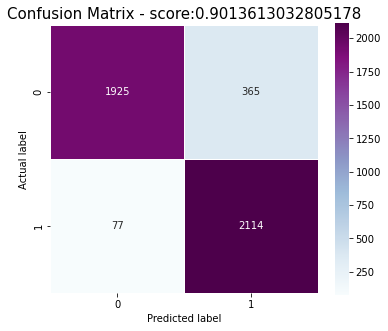

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2290
           1       0.85      0.96      0.91      2191

    accuracy                           0.90      4481
   macro avg       0.91      0.90      0.90      4481
weighted avg       0.91      0.90      0.90      4481



In [188]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [189]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.921
Test score: 0.830


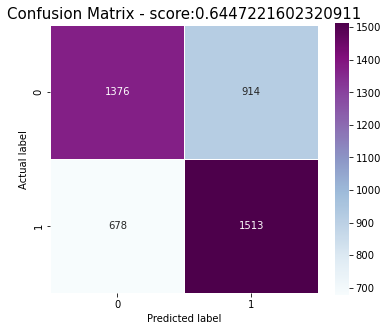

              precision    recall  f1-score   support

           0       0.67      0.60      0.63      2290
           1       0.62      0.69      0.66      2191

    accuracy                           0.64      4481
   macro avg       0.65      0.65      0.64      4481
weighted avg       0.65      0.64      0.64      4481



In [190]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

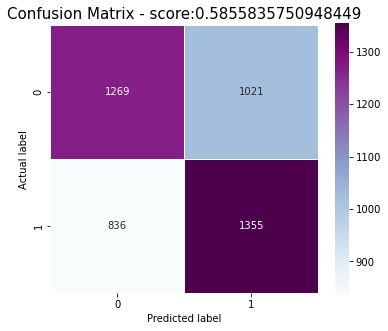

              precision    recall  f1-score   support

           0       0.60      0.55      0.58      2290
           1       0.57      0.62      0.59      2191

    accuracy                           0.59      4481
   macro avg       0.59      0.59      0.59      4481
weighted avg       0.59      0.59      0.59      4481



In [191]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


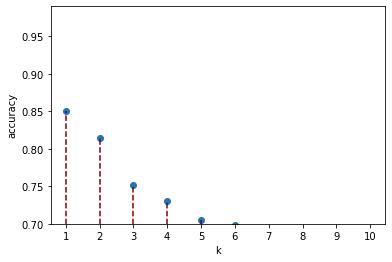

In [192]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

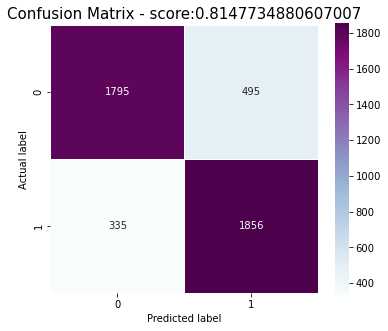

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2290
           1       0.79      0.85      0.82      2191

    accuracy                           0.81      4481
   macro avg       0.82      0.82      0.81      4481
weighted avg       0.82      0.81      0.81      4481



In [193]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [194]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.7905484572895163
Testing accuracy =  0.7295246596741799


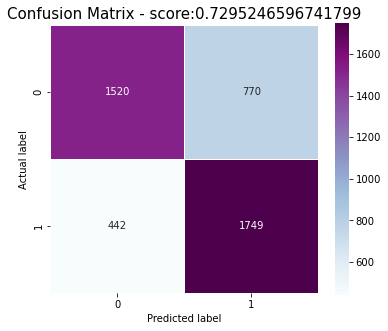

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      2290
           1       0.69      0.80      0.74      2191

    accuracy                           0.73      4481
   macro avg       0.73      0.73      0.73      4481
weighted avg       0.74      0.73      0.73      4481



0.7295246596741799

In [195]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [196]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))

Training accuracy =  0.6227752050437985
Testing accuracy =  0.6239678643160009


In [197]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6586983471486172 0.9703080685376262 0.9128796047347327 0.9128796047347327 0.8018762743179222 0.6552728609894785


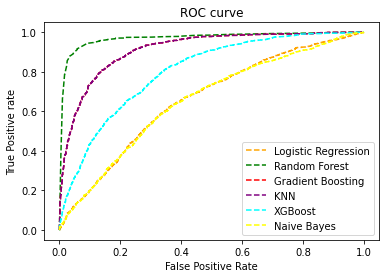

In [198]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [199]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [200]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.630663
1,Random Forest Classifier,0.901361
2,Gradient Boosting Classifier,0.829502
3,SVC,0.585584
4,KNierest Neighbor,0.814773
5,XBoost,0.729525
6,Naive Bayes Classifier,0.603546


In [201]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

In [202]:
y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.9013613032805178


In [203]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
2,1,1,0
3103,0,0,0
3997,1,1,0
8217,1,1,0
6477,1,1,0
6667,0,1,-1
7925,0,0,0
6760,1,1,0
10402,1,1,0
818,1,1,0


# FINAL FEATURES AND FITTING IT INTO THE MODEL